In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'availability',
       'number_of_reviews_ltm', 'license;'],
      dtype='object')

# Q1 - What is the number of available rooms by each type ?

In [4]:
def rooms_availability(df) :
    available_rooms = df.groupby('room_type')['availability'].count()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen']
    bars = plt.bar(available_rooms.index , available_rooms.values , color = colors)
    plt.xlabel('Room Type')
    plt.ylabel('Available Rooms')
    plt.title('Number of Available Rooms by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f} room',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

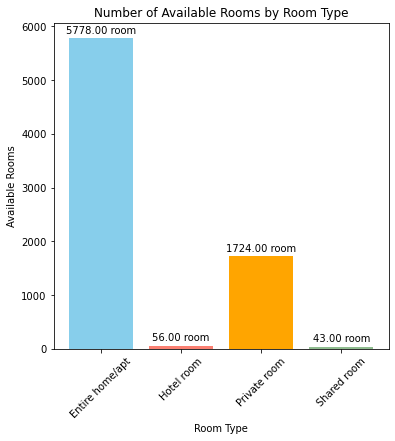

In [5]:
rooms_availability(df)

# Q2 - What is the average price for each room ?

In [6]:
def average_price(df) : 
    avg = df.groupby('room_type')['price'].mean()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen']
    bars = plt.bar(avg.index , avg.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title('Average Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

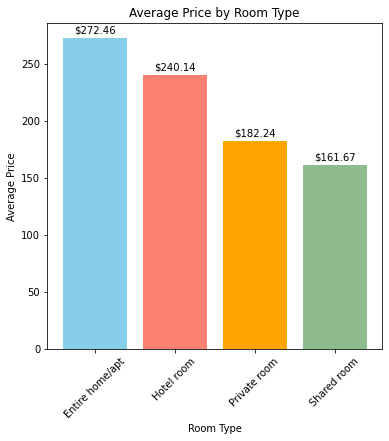

In [7]:
average_price(df)

# Q3 - What is the highest price for each room ?

In [8]:
def highest_price(df) : 
    highest = df.groupby('room_type')['price'].max()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen']
    bars = plt.bar(highest.index , highest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Max Price')
    plt.title('Maximum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

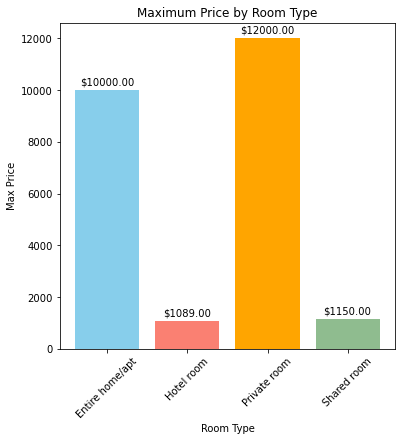

In [9]:
highest_price(df)

# Q4 - What is the lowest price for each room ?

In [10]:
def lowest_price(df) : 
    lowest = df.groupby('room_type')['price'].min()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen']
    bars = plt.bar(lowest.index , lowest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Min Price')
    plt.title('Minimum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

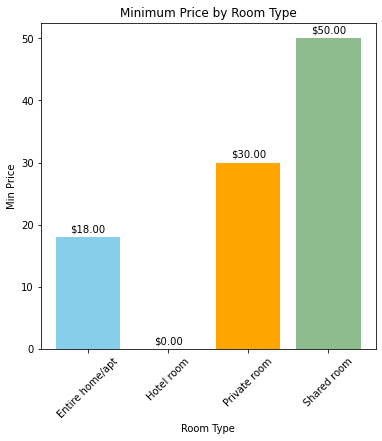

In [11]:
lowest_price(df)

### Data Cleaning

In [12]:
def clean_missing_data(df):
    missing_columns_values = df.columns[df.isnull().any()]
    for column in missing_columns_values:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('Unknown')
        elif df[column].dtype == 'bool':
            df[column] = df[column].fillna(False)
        else:
            df[column] = df[column].fillna(df[column].mean())

### Check file is in the types range or not

In [13]:
def get_file_types(file_type):
    while True :
        file_path = input('Please enter your file path : ')
        if file_path.endswith(tuple(file_type)):
            return file_path
        else :
            print('Please enter a valid path from this range {}'.format(file_type))

### Check every file Path

In [14]:
def check_file_path(file_path):
    
    if file_path.endswith('csv'):
        df = pd.read_csv(file_path.strip())
        
    elif file_path.endswith('xlsx'):
        df = pd.read_excel(file_path.strip())
        
    elif file_path.endswith('sql'):
        df = pd.read_sql(file_path.strip())
        
    return df

### The code runs here

Please enter your file path : listings.csv


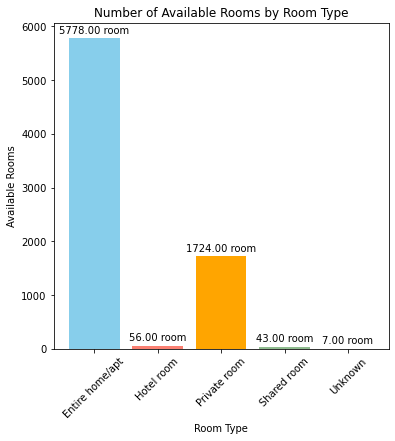

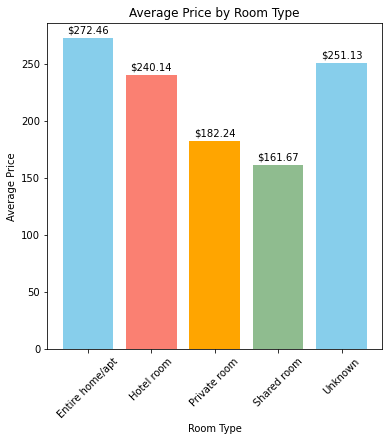

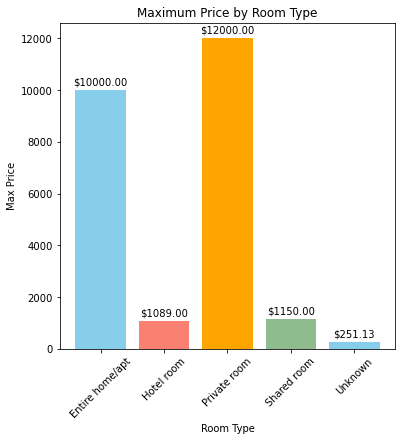

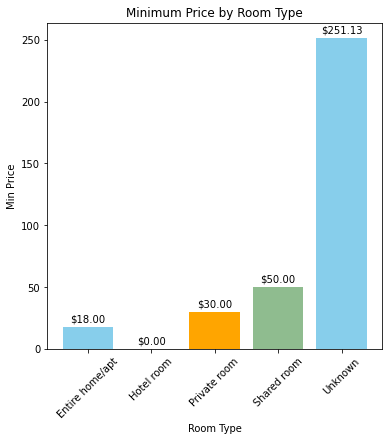

In [15]:
def main():
    file_type = ['.csv','.xlsx','.sql']
    file_path = get_file_types(file_type)
    df = check_file_path(file_path)
    clean_missing_data(df)
    rooms_availability(df)
    average_price(df)
    highest_price(df)
    lowest_price(df)
if __name__ == "__main__":
    main()